## Import Libraries yang dibutuhkan

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

## Proses Data Scraping

In [2]:
url = 'https://www.tokopedia.com/search?navsource=&ob=23&search_id=20250131182342FCC6A3404B70B4397OB6&srp_component_id=04.06.00.00&srp_page_id=&srp_page_title=&st=product&q=handphone%20android'
driver = "C:/Users/raihan/Downloads/chromedriver-win64/chromedriver-win64/chromedriver.exe"

In [3]:
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [4]:
driver = webdriver.Chrome()
driver.get(url)

In [5]:
data = []
for i in range(50):
    WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, "#zeus-root")))
    time.sleep(3)
    
    for j in range(20):
        driver.execute_script("window.scrollBy(0, 250)")
        time.sleep(3)

    driver.execute_script("window.scrollBy(50, 0)")
    time.sleep(3)

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    for item in soup.findAll('div', class_ = 'css-5wh65g') :
        foto_produk = item.find('img', class_ = 'css-1c345mg NWVIhquIvF0Jc0Qlizjluw==')
        url_foto = foto_produk['src']
        print(url_foto)
        nama = item.find('span', class_ = '_0T8-iGxMpV6NEsYEhwkqEg==').get_text()
        print(nama)
        harga = item.find('div', class_ = '_67d6E1xDKIzw+i2D2L0tjw==').get_text()
        print(harga)
        bisa_cod = item.findAll('span', class_ = 'Im5P5op64sGXgtFIJ0ZEzA==')
        if len(bisa_cod) > 0 :
            cod = item.find('span', class_ = 'Im5P5op64sGXgtFIJ0ZEzA==').get_text()
        else :
            cod = ''
        print(cod)
        tjl = item.findAll('span', class_ = 'se8WAnkjbVXZNA8mT+Veuw==')
        if len(tjl) > 0 :
            terjual = item.find('span', class_ = 'se8WAnkjbVXZNA8mT+Veuw==').get_text()
        else :
            terjual = ''
        print(terjual)
        rtg = item.findAll('span', class_ = '_9jWGz3C-GX7Myq-32zWG9w==')
        if len(rtg) > 0 :
            rating = item.find('span', class_ = '_9jWGz3C-GX7Myq-32zWG9w==').get_text()
        else :
            rating = ''
        print(rating)
        lks = item.findAll('span', class_ = 'pC8DMVkBZGW7-egObcWMFQ== flip')
        if len(lks) > 0 :
            lokasi = item.find('span', class_ = 'pC8DMVkBZGW7-egObcWMFQ== flip').get_text()
        else :
            lokasi = ''
        print(lokasi)
        ntk = item.findAll('span', class_ = 'T0rpy-LEwYNQifsgB-3SQw== pC8DMVkBZGW7-egObcWMFQ== flip')
        if len(ntk) > 0 :
            nama_toko = item.find('span', class_ = 'T0rpy-LEwYNQifsgB-3SQw== pC8DMVkBZGW7-egObcWMFQ== flip').get_text()
        else :
            nama_toko = ''
        print(nama_toko)

        # Simpan dalam list
        data.append([url_foto, nama, harga, cod, terjual, rating, lokasi, nama_toko])

    time.sleep(3)
    driver.find_element(By.CSS_SELECTOR, "button[aria-label^='Laman berikutnya']").click()
    time.sleep(3)

https://images.tokopedia.net/img/cache/200-square/VqbcmM/2024/9/25/3553fedb-256b-43b4-89df-0d29497c9b5e.jpg.webp?ect=4g
OPPO A3 8GB/128GB Online Exclusive (Garansi Resmi) - Promo - Hitam
Rp2.099.000

1rb+ terjual

Tangerang
OPPO OFFICIAL STORE
https://images.tokopedia.net/img/cache/200-square/VqbcmM/2025/1/23/a792a392-f36e-4718-b84b-7fd56cca0cc3.jpg.webp?ect=4g
Xiaomi Redmi Note 14 | 108 MP AI Camera | 5500mAh 33W Turbo Charging | MediaTek Helio G99 Ultra | [Official Store] - Midnight Black, 8+256GB
Rp2.599.000

100+ terjual

Kab. Tangerang
Xiaomi Official Store
https://images.tokopedia.net/img/cache/200-square/VqbcmM/2024/11/30/3016a6c6-709f-4458-8581-62dd00ddd69b.jpg.webp?ect=4g
Official realme Note 60 4GB+8GB*|64GB  ArmorShel Protection | TÜV Rheinland | 32MP Camera| 48-month Fluency | IP64 Dust & Water Resistanc - Marble Black
Rp1.249.000

250+ terjual

Kab. Tangerang
realme Official Store
https://images.tokopedia.net/img/cache/200-square/hDjmkQ/2024/12/5/947d96e7-592f-4202-b4df-d2

## Hasil Data Scraping

In [6]:
import re

# Buat DataFrame
df = pd.DataFrame(data, columns=['URL Foto', 'Nama Produk', 'Harga Produk', 'COD', 'Jumlah Terjual', 'Rating Produk', 'Lokasi Toko', 'Nama Toko'])
print(df)

# Daftar merek HP yang umum
merek_hp_list = ["Samsung", "Xiaomi", "Redmi", "Realme", "Oppo", "Vivo", "Apple", "Infinix", 
                 "Asus", "Nokia", "Sony", "Lenovo", "Huawei", "Honor", "Google", "Motorola", "POCO", "GT", "Advan", "Evercross", "Evercoss"]

def extract_merek(nama_produk):
    for merek in merek_hp_list:
        if re.search(rf'\b{merek}\b', nama_produk, re.IGNORECASE):  
            return merek
    return "Unknown"

df["Merek HP"] = df["Nama Produk"].apply(extract_merek)

print(df)

                                               URL Foto  \
0     https://images.tokopedia.net/img/cache/200-squ...   
1     https://images.tokopedia.net/img/cache/200-squ...   
2     https://images.tokopedia.net/img/cache/200-squ...   
3     https://images.tokopedia.net/img/cache/200-squ...   
4     https://images.tokopedia.net/img/cache/200-squ...   
...                                                 ...   
4213  https://images.tokopedia.net/img/cache/200-squ...   
4214  https://images.tokopedia.net/img/cache/200-squ...   
4215  https://images.tokopedia.net/img/cache/200-squ...   
4216  https://images.tokopedia.net/img/cache/200-squ...   
4217  https://images.tokopedia.net/img/cache/200-squ...   

                                            Nama Produk Harga Produk  \
0     OPPO A3 8GB/128GB Online Exclusive (Garansi Re...  Rp2.099.000   
1     Xiaomi Redmi Note 14 | 108 MP AI Camera | 5500...  Rp2.599.000   
2     Official realme Note 60 4GB+8GB*|64GB  ArmorSh...  Rp1.249.000   
3  

## Menyimpan Data Hasil Scraping

In [7]:
# Simpan ke file Excel
df.to_excel("data_produk.xlsx", index=False)

## Import Data

In [13]:
# Import data
df = pd.read_excel('data_produk.xlsx', sheet_name = 'Sheet1')

# Melihat 5 baris pertama
df.head()

,URL Foto,Nama Produk,Harga Produk,COD,Jumlah Terjual,Rating Produk,Lokasi Toko,Nama Toko,Merek HP
0,https://images.tokopedia.net/img/cache/200-squ...,OPPO A3 8GB/128GB Online Exclusive (Garansi Re...,Rp2.099.000,NaN,1rb+ terjual,NaN,Tangerang,OPPO OFFICIAL STORE,Oppo
1,https://images.tokopedia.net/img/cache/200-squ...,Xiaomi Redmi Note 14 | 108 MP AI Camera | 5500...,Rp2.599.000,NaN,100+ terjual,NaN,Kab. Tangerang,Xiaomi Official Store,Xiaomi
2,https://images.tokopedia.net/img/cache/200-squ...,Official realme Note 60 4GB+8GB*|64GB ArmorSh...,Rp1.249.000,NaN,250+ terjual,NaN,Kab. Tangerang,realme Official Store,Realme
3,https://images.tokopedia.net/img/cache/200-squ...,Infinix Hot 50 5G 8/256 GB Garansi Resmi - NFC...,Rp1.719.000,NaN,80+ terjual,NaN,Jakarta Pusat,Digitech Mall,Infinix
4,https://images.tokopedia.net/img/cache/200-squ...,"Samsung Galaxy S24 FE [8/256] - [Blue, Graphit...",Rp9.799.000,NaN,500+ terjual,NaN,Jakarta Utara,Samsung Official Store,Samsung


In [14]:
# Melihat info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   URL Foto        4218 non-null   object 
 1   Nama Produk     4218 non-null   object 
 2   Harga Produk    4218 non-null   object 
 3   COD             192 non-null    object 
 4   Jumlah Terjual  4022 non-null   object 
 5   Rating Produk   3020 non-null   float64
 6   Lokasi Toko     4217 non-null   object 
 7   Nama Toko       4217 non-null   object 
 8   Merek HP        4218 non-null   object 
dtypes: float64(1), object(8)
memory usage: 296.7+ KB


## Data Cleaning

In [15]:
# Membersihkan kolom yang tidak digunakan
df = df.drop(columns = ['URL Foto'])

In [16]:
# Mengecek missing values
print(df.isnull().sum())

Nama Produk          0
Harga Produk         0
COD               4026
Jumlah Terjual     196
Rating Produk     1198
Lokasi Toko          1
Nama Toko            1
Merek HP             0
dtype: int64


In [17]:
# Mengisi missing values dengan nilai yang sesuai
df['Rating Produk'] = df['Rating Produk'].fillna(0)
df['Jumlah Terjual'] = df['Jumlah Terjual'].fillna('0 Terjual')
df['COD'] = df['COD'].fillna('Tidak Bisa COD')

# Menghapus data yang tidak valid (tidak terdapat nama toko)
df = df.dropna(subset = ['Nama Toko', 'Lokasi Toko'])

# Mengecek missing values kembali
print(df.isnull().sum())

Nama Produk       0
Harga Produk      0
COD               0
Jumlah Terjual    0
Rating Produk     0
Lokasi Toko       0
Nama Toko         0
Merek HP          0
dtype: int64


Sudah tidak terdapat nilai null dalam data

In [18]:
# Menghapus data duplikat
df.duplicated().sum()
df = df.drop_duplicates()
df.duplicated().sum() # Mengecek Kembali

0

In [19]:
# Mengubah kolom 'Harga Produk' ke tipe data numerik
df['Harga Produk'] = df['Harga Produk'].str.replace('Rp', '').str.replace('.','').astype(int)
bins_harga = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, np.inf]
label_harga = ['0-1 juta', '1-2 juta', '2-3 juta', '3-4 juta', '4-5 juta', '5-6 juta', '6-7 juta', '7-8 juta', '8-9 juta', '9-10 juta', '>10 juta']
df['Kelompok Harga'] = pd.cut(df['Harga Produk'], bins=bins_harga, labels=label_harga)

In [20]:
# Mengubah kolom terjual
df['Jumlah Terjual'] = df['Jumlah Terjual'].str.replace(' terjual', '').str.replace('rb', '000').str.replace(' Terjual', '')
df['Jumlah Terjual'] = df['Jumlah Terjual'].str.replace(r'[^0-9]', '', regex=True).astype(int)
# Pengelompokan jumlah terjual
def kelompok_terjual(x):
    if x <= 1000:
        return '0-1000'
    elif x <= 2000:
        return '1001-2000'
    elif x <= 3000:
        return '2001-3000'
    elif x <= 4000:
        return '3001-4000'
    elif x <= 5000:
        return '4001-5000'
    else:
        return '5000+'

df['kategori_jumlah_terjual'] = df['Jumlah Terjual'].apply(kelompok_terjual)

In [21]:
# Mengecek data kembali
print(df)

                                            Nama Produk  Harga Produk  \
0     OPPO A3 8GB/128GB Online Exclusive (Garansi Re...       2099000   
1     Xiaomi Redmi Note 14 | 108 MP AI Camera | 5500...       2599000   
2     Official realme Note 60 4GB+8GB*|64GB  ArmorSh...       1249000   
3     Infinix Hot 50 5G 8/256 GB Garansi Resmi - NFC...       1719000   
4     Samsung Galaxy S24 FE [8/256] - [Blue, Graphit...       9799000   
...                                                 ...           ...   
4208  REALME 13+ 5G RAM 12/256 GB | REALME 13 PLUS 5...       3199900   
4209            XIAOMI REDMI NOTE 10 PRO SECOND FULLSET       1650000   
4210                       OPPO A57 4/64 SECOND FULLSET        900000   
4211         Samsung Galaxy A30s 4GB/64GB ex Resmi Indo       1050000   
4212                  VIVO Y27 4G 6/128GB GARANSI RESMI       1600000   

                 COD  Jumlah Terjual  Rating Produk     Lokasi Toko  \
0     Tidak Bisa COD            1000            0.0 

In [22]:
# Lokasi Toko
df['Lokasi Toko'] = df['Lokasi Toko'].str.title()

In [23]:
print(df.head())

                                         Nama Produk  Harga Produk  \
0  OPPO A3 8GB/128GB Online Exclusive (Garansi Re...       2099000   
1  Xiaomi Redmi Note 14 | 108 MP AI Camera | 5500...       2599000   
2  Official realme Note 60 4GB+8GB*|64GB  ArmorSh...       1249000   
3  Infinix Hot 50 5G 8/256 GB Garansi Resmi - NFC...       1719000   
4  Samsung Galaxy S24 FE [8/256] - [Blue, Graphit...       9799000   

              COD  Jumlah Terjual  Rating Produk     Lokasi Toko  \
0  Tidak Bisa COD            1000            0.0       Tangerang   
1  Tidak Bisa COD             100            0.0  Kab. Tangerang   
2  Tidak Bisa COD             250            0.0  Kab. Tangerang   
3  Tidak Bisa COD              80            0.0   Jakarta Pusat   
4  Tidak Bisa COD             500            0.0   Jakarta Utara   

                Nama Toko Merek HP Kelompok Harga kategori_jumlah_terjual  
0     OPPO OFFICIAL STORE     Oppo       2-3 juta                  0-1000  
1   Xiaomi Officia

In [24]:
# Mengganti nama kolom supaya memenuhi kaidah bahasa pemrograman
df = df.rename(columns = {
        'Nama Produk' : 'nama_produk',
        'Harga Produk' : 'harga_produk',
        'COD' : 'cod',
        'Jumlah Terjual' : 'jumlah_terjual',
        'Rating Produk' : 'rating',
        'Lokasi Toko' : 'lokasi',
        'Nama Toko' : 'nama_toko',
        'Merek HP' : 'merk_hp',
        'Kelompok Harga' : 'kelompok_harga',
        'kategori_jumlah_terjual' : 'kategori_terjual'})
print(df.head())

                                         nama_produk  harga_produk  \
0  OPPO A3 8GB/128GB Online Exclusive (Garansi Re...       2099000   
1  Xiaomi Redmi Note 14 | 108 MP AI Camera | 5500...       2599000   
2  Official realme Note 60 4GB+8GB*|64GB  ArmorSh...       1249000   
3  Infinix Hot 50 5G 8/256 GB Garansi Resmi - NFC...       1719000   
4  Samsung Galaxy S24 FE [8/256] - [Blue, Graphit...       9799000   

              cod  jumlah_terjual  rating          lokasi  \
0  Tidak Bisa COD            1000     0.0       Tangerang   
1  Tidak Bisa COD             100     0.0  Kab. Tangerang   
2  Tidak Bisa COD             250     0.0  Kab. Tangerang   
3  Tidak Bisa COD              80     0.0   Jakarta Pusat   
4  Tidak Bisa COD             500     0.0   Jakarta Utara   

                nama_toko  merk_hp kelompok_harga kategori_terjual  
0     OPPO OFFICIAL STORE     Oppo       2-3 juta           0-1000  
1   Xiaomi Official Store   Xiaomi       2-3 juta           0-1000  
2   r

## Exploratory Data Analysis (EDA)

In [25]:
# Statistika Deskriptif
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

,harga_produk,jumlah_terjual,rating
count,"3,369","3,369","3,369"
mean,"3,753,690",162,4
std,"4,055,704",509,2
min,"24,000",0,0
25%,"1,499,000",13,5
50%,"2,389,000",40,5
75%,"4,299,000",100,5
max,"28,499,000","10,000",5


Berdasarkan deskripsi statistik, harga handphone di pasar memiliki rata-rata sekitar 3,75 juta rupiah, dengan variasi harga yang cukup besar (standar deviasi 4,05 juta rupiah). Harga termurah berada di 24 ribu rupiah, sementara yang termahal mencapai 28,5 juta rupiah, menunjukkan adanya rentang produk dari kelas entry-level hingga flagship.

Dari segi penjualan, rata-rata jumlah unit terjual per produk adalah 162 unit, tetapi distribusinya sangat bervariasi (standar deviasi 509), dengan produk terlaris mencapai 10.000 unit. Sebagian besar produk memiliki penjualan relatif rendah, terlihat dari nilai median hanya 40 unit.

Dalam hal rating, mayoritas produk mendapatkan rating tinggi, dengan nilai median dan kuartil atas berada di angka 5. Namun, adanya nilai minimum 0 menunjukkan bahwa ada beberapa produk dengan ulasan sangat buruk atau tanpa ulasan sama sekali.

In [26]:
df['merk_hp'].value_counts()

merk_hp
Samsung     1077
Xiaomi       772
Infinix      466
Vivo         384
Realme       304
Oppo         242
Redmi         72
Evercoss      15
Unknown       15
Advan         10
Google         7
Motorola       3
Lenovo         2
Name: count, dtype: int64

In [27]:
df['kelompok_harga'].value_counts().reindex(label_harga)

kelompok_harga
0-1 juta      232
1-2 juta     1190
2-3 juta      698
3-4 juta      367
4-5 juta      219
5-6 juta      171
6-7 juta      129
7-8 juta       51
8-9 juta       48
9-10 juta      30
>10 juta      234
Name: count, dtype: int64

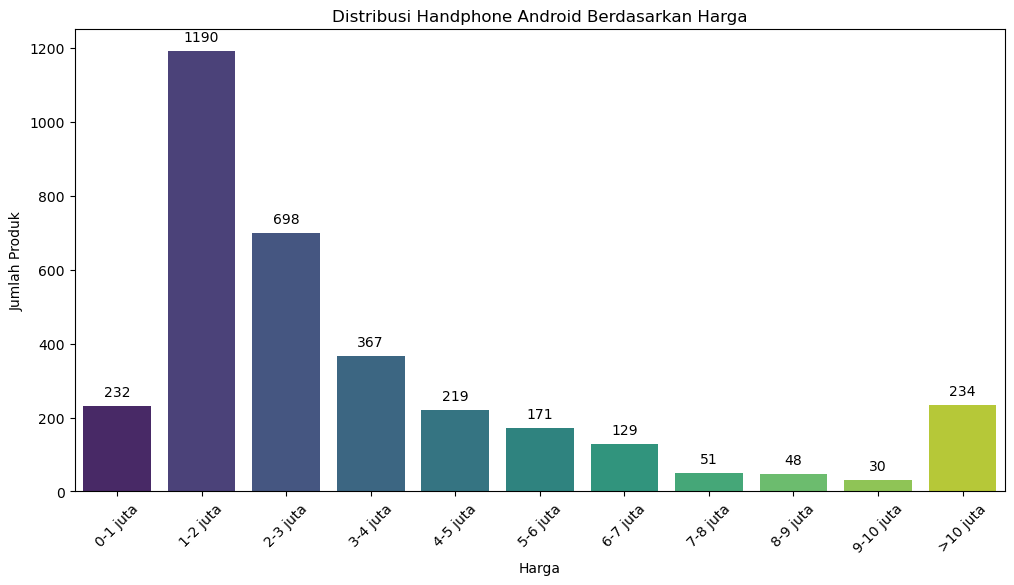

In [28]:
# Membuat visualisasi distribusi harga produk berdasarkan kelompok harga
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=df['kelompok_harga'].value_counts().index, y=df['kelompok_harga'].value_counts().values, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Distribusi Handphone Android Berdasarkan Harga')
plt.xlabel('Harga')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=45)
plt.show()

Persebaran harga handphone android di awal tahun 2025 mayoritas produk berada pada rentang harga 1-2 juta dan 2-3 juta, yaitu sebesar 1190 dan 698 produk. Dari hal tersebut, dapat diketahui bahwa pasar handphone android didominasi oleh produk dengan harga yang terjangkau. Penurunan jumlah produk secara bertahap terlihat pada rentang harga 3-4 juta sampai 9-10 juta.

Tetapi, di rentang harga lebih dari 10 juta terjadi kenaikan produk menjadi sebesar 234 produk. Hal ini menunjukkan bahwa adanya permintaan yang cukup banyak untuk produk handphone android kelas flagship atau produk mewah dari merk handphone android.

Dari grafik tersebut, diketahui bahwa terdapat segmentasi pasar handphone android berdasarkan harga yang ditandai dengan ketidakmerataan distribusi. Banyak merk handphone bersaing untuk memproduksi produk di rentang harga 1-2 juta, 2-3 juta, dan lebih dari 10 juta. Perusahaan perlu menyesuaikan strategi pemasaran untuk setiap segmen, dengan fokus pada nilai dan kualitas untuk produk premium, serta harga kompetitif dan promosi menarik untuk produk berharga terjangkau dan dapat bersaing di rentang harga tersebut.

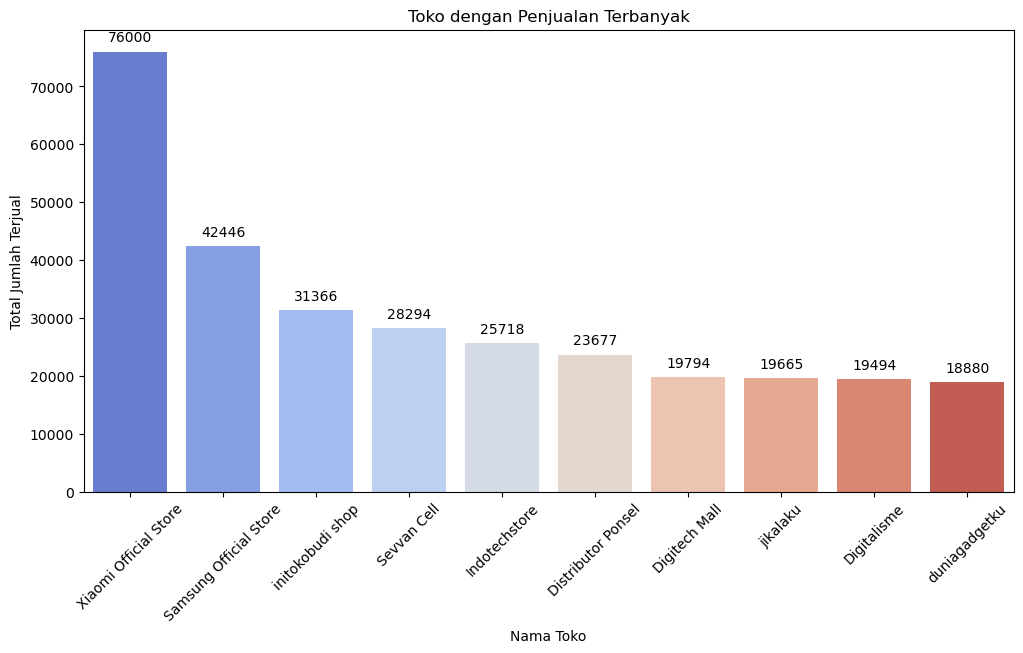

In [35]:
# Hitung total penjualan per toko dan ambil 10 toko teratas
top_toko = df.groupby('nama_toko')['jumlah_terjual'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_toko.index, y=top_toko.values, palette="coolwarm")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Format angka sebagai integer
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.xticks(rotation=45)
plt.xlabel("Nama Toko")
plt.ylabel("Total Jumlah Terjual")
plt.title("Toko dengan Penjualan Terbanyak")
plt.show()

Dari grafik disamping, dapat diketahui bahwa masyarakat cenderung lebih memilih membeli di “Official Store” dibandingkan non-official store yang dibuktikan dengan "Xiaomi Official Store" yang mendominasi pasar, mencatat 76.000 unit terjual—jauh di atas pesaingnya. Lalu "Samsung Official Store" berada di posisi kedua dengan 42.446 unit. Walaupun begitu, tetap terdapat masyarakat yang membeli tidak di official shop, seperti di toko "initokobudi shop" (31.366 unit), "Sevvan Cell" (28.294 unit), dan "Indotechstore" (25.718 unit).

Dari grafik tersebut, dapat disimpulkan bahwa Xiaomi Official Store dan Samsung Official Store mendominasi pasar sebagai toko online pilihan untuk membeli handphone android. Dapat dilihat juga bahwa selain kedua tersebut, terjadi persaingan ketat di antara toko lainnya, seperti toko Digitech Mall, jikalaku, Digitalisme, dan duniagadgetku yang selisih masing-masing toko tidak terlampau jauh. Hal ini mengindikasikan bahwa beberapa masyarakat juga menjadikan toko non-official menjadi pilihan dalam membeli handphone.

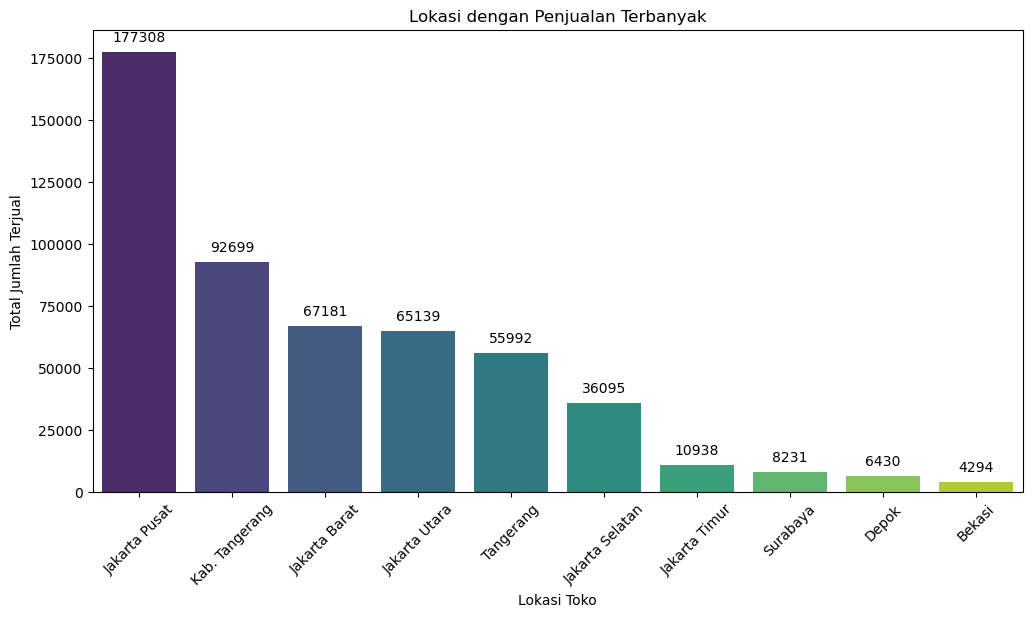

In [36]:
# Hitung total penjualan per lokasi dan ambil 10 lokasi teratas
top_lokasi = df.groupby('lokasi')['jumlah_terjual'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_lokasi.index, y=top_lokasi.values, palette="viridis")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel("Lokasi Toko")
plt.ylabel("Total Jumlah Terjual")
plt.title("Lokasi dengan Penjualan Terbanyak")
plt.show()

Dari grafik disamping, diketahui bahwa toko yang berada di Jakarta Pusat mendominasi penjualan handphone android di Indonesia, yaitu sebanyak 177.308 unit terjual, jauh melampaui lokasi lain. Kabupaten Tangerang menjadi daerah kedua dengan 92.699 unit terjual. sementara Jakarta Barat, Jakarta Utara, dan Tangerang mencatat penjualan di kisaran 30-60 ribuan unit. Jakarta Timur, Surabaya, Depok, dan Bekasi memiliki penjualan yang lebih rendah, dengan Bekasi hanya mencapai 4.294 unit.

Perbedaan yang jauh ini menunjukkan bahwa Jakarta Pusat menjadi pusat utama dalam perdagangan handphone android dan kemungkinan karena lokasi yang strategis, banyak pusat perbelanjaan besar, dan daya beli masyarakatnya yang tinggi.

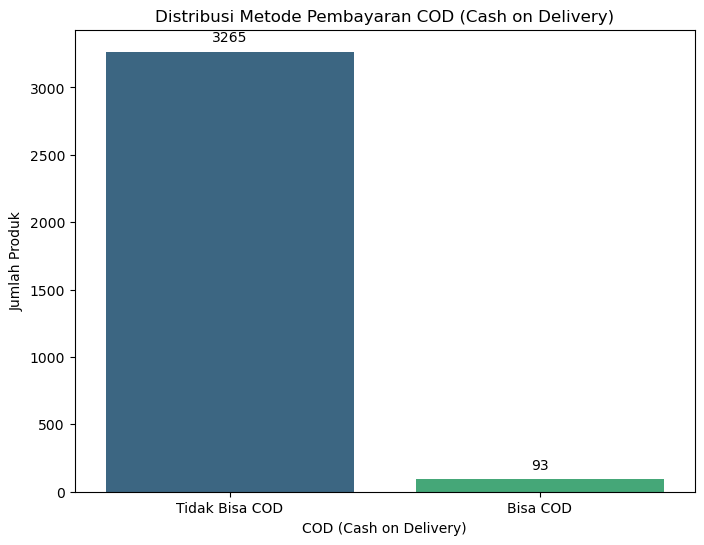

In [37]:
df_cod = df[df['cod'].isin(["Bisa COD", "Tidak Bisa COD"])]

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_cod, x='cod', palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
plt.title('Distribusi Metode Pembayaran COD (Cash on Delivery)')
plt.xlabel('COD (Cash on Delivery)')
plt.ylabel('Jumlah Produk')
plt.show()

Dari grafik disamping, dapat dilihat bahwa mayoritas produk yang dijual/terdaftar di marketplace tidak mendukung metode pembayaran Cash on Delivery (COD). Sebanyak 3.265 produk tidak menyediakan opsi COD, sementara hanya 93 produk yang bisa dibeli dengan metode ini, menunjukkan perbedaan yang sangat signifikan.

Ketimpangan ini dapat disebabkan oleh berbagai faktor, seperti jenis produk, kebijakan penjual, keterbatasan logistik, lokasi pengiriman, kegagalan pembayaran, dan lainnya. Sudah banyak kasus kegagalan pembayaran saat transaksi COD dilakukan yang merugikan pihak penjual maupun pihak kurir.

Dari hal tersebut, calon pembeli dapat mempertimbangkan opsi pembayaran non COD dan penjual dapat memberikan opsi yang lebih banyak untuk memudahkan calon pembeli, seperti logistik yang diperbanyak opsi pilihannya dan kebijakan penjual yang memudahkan calon pembeli agar sama-sama nyaman dalam transaksi.

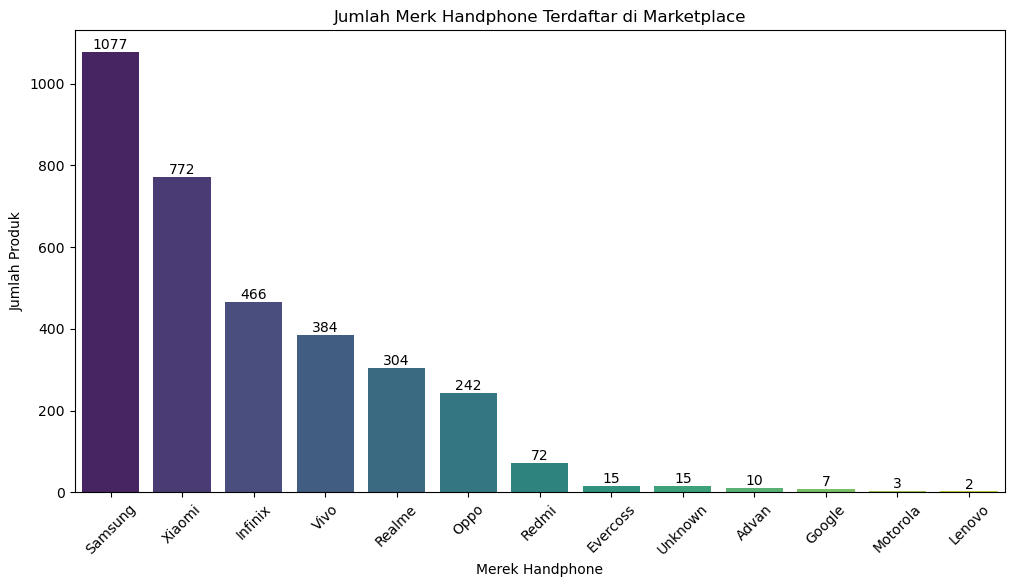

In [38]:
# Visualisasi penjualan berdasarkan merek HP
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=df['merk_hp'].value_counts().index, 
                 y=df['merk_hp'].value_counts().values, 
                 palette='viridis')
plt.title('Jumlah Merk Handphone Terdaftar di Marketplace')
plt.xlabel('Merek Handphone')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()

Berdasarkan grafik disamping, diketahui Samsung menjadi pemimpin pasar handphone dengan jumlah produk terbanyak, mencapai 1.077 unit yang terdaftar di Marketplace Tokopedia, disusul oleh Xiaomi dengan 772 unit. Infinix menempati posisi ketiga dengan 466 produk, sementara Vivo (384 unit) dan Realme (304 unit) juga memiliki pasar yang cukup kuat.
 
Oppo terdapat 242 unit yang terdaftar di marketplace, sedangkan Redmi hanya memiliki 72 unit. Sementara itu, merek-merek lain seperti Evercoss, Unknown, Advan, Google, Motorola, dan Lenovo memiliki jumlah produk yang jauh lebih sedikit, sebagian besar di bawah 20 unit.

Data ini menunjukkan bahwa Samsung dan Xiaomi mendominasi marketplace, baik dari segi jumlah produk maupun kehadiran merek. Sementara itu, merek lain memiliki pangsa pasar yang lebih kecil, kemungkinan karena keterbatasan distribusi atau segmentasi pasar yang lebih spesifik, terutama di Indonesia.

In [58]:
# Mencari insight melalui SQL
import sqlite3

# Mengkoneksikan data ke SQL
conn = sqlite3.connect(':memory:')
df.to_sql('produk', conn, index=False, if_exists='replace')
query = """
SELECT nama_produk, SUM(jumlah_terjual) AS total_terjual, kelompok_harga
FROM produk
GROUP BY nama_produk
ORDER BY total_terjual DESC
LIMIT 10
"""
top_produk = pd.read_sql_query(query, conn)
print("Handphone yang paling banyak terjual:")
print(top_produk)

Handphone yang paling banyak terjual:
                                         nama_produk  total_terjual  \
0                        Samsung Galaxy A05s 6/128GB          14050   
1  Official Xiaomi POCO M6 (8GB+256GB) | Kamera u...          10000   
2  Official Xiaomi POCO F6 (8GB+256GB) | (12GB + ...          10000   
3  Xiaomi 14T (12/256) (12/512) | Leica Summilux ...           8000   
4  Official Xiaomi Redmi Note 13 5G | Tiga kamera...           8000   
5  Official Redmi A3 | Layar Muluz 90 Hz berukura...           8000   
6                      Samsung Galaxy A55 5G 8/256GB           6193   
7                      Samsung Galaxy A35 5G 8/256GB           6070   
8  Official Xiaomi Redmi Note 13 (8GB/128GB) | (8...           6000   
9  Official Xiaomi Redmi 13 (8GB/128GB) | (8GB/25...           6000   

  kelompok_harga  
0       2-3 juta  
1       1-2 juta  
2       5-6 juta  
3       6-7 juta  
4       3-4 juta  
5       1-2 juta  
6       5-6 juta  
7       4-5 juta  
8       2

Berdasarkan hasil analisis disamping, terlihat bahwa Samsung dan Xiaomi mendominasi pasar dengan berbagai model di berbagai rentang harga. Samsung Galaxy A05s menjadi produk yang paling laris dengan 14.050 unit terjual, hal ini menunjukkan bahwa segmen handphone harga 2-3 juta sangat diminati oleh konsumen. Selain itu, Xiaomi juga mendominasi pasar dengan berbagai model dari lini POCO, Redmi, dan seri flagshipnya, yaitu Xiaomi 14T, yang menunjukkan adanya minat yang tinggi untuk handphone di rentang harga 1-7 juta.

Sebagian besar produk terlaris berada di segmen harga 1-3 juta, menunjukkan bahwa konsumen cenderung mencari perangkat dengan harga yang terjangkau namun tetap fungsional dan bagus. Namun, ada juga model dengan harga lebih tinggi seperti Xiaomi POCO F6 dan Samsung Galaxy A55, yang menandakan bahwa beberapa segmen pasar juga tertarik pada perangkat dengan spesifikasi lebih premium.

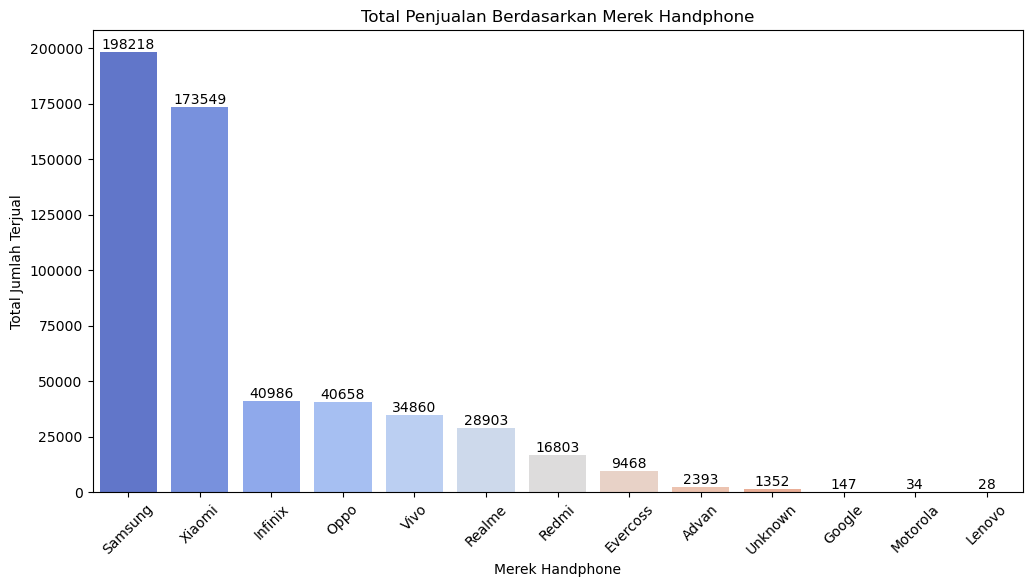

In [53]:
# Visualisasi jumlah terjual berdasarkan merek HP (Sum)
df_merk = df.groupby('merk_hp')['jumlah_terjual'].sum().reset_index().sort_values(by='jumlah_terjual', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=df_merk['merk_hp'], y=df_merk['jumlah_terjual'], palette='coolwarm')
plt.title('Total Penjualan Berdasarkan Merek Handphone')
plt.xlabel('Merek Handphone')
plt.ylabel('Total Jumlah Terjual')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()

Berdasarkan grafik disamping, diketahui Samsung dan Xiaomi saling bersaing untuk dapat mendominasi pasar handphone android dengan angka penjualan yang tinggi, yakni 198.218 unit dan 173.549 unit. Infinix, Oppo, Vivo, dan Realme saling bersaing yang dimana memiliki angka penjualan yang sama-sama hampir mendekati satu sama lain. Sementara itu, merk-merk lain memiliki perbedaan yang jauh dari segi angka penjualan di marketplace Tokopedia dari beberapa merk-merk ternama di Indonesia.

Sehingga dari hal tersebut, penjualan Handphone di Indonesia sangat dipengaruhi oleh faktor-faktor yang sangat spesifik, mulai dari merk yang terkenal, kejelasan garansi, harga, service center, dan lain-lain yang memang membuat beberapa merk kesulitan dalam bersaing, terutama yang baru terjun ke pasar untuk dapat dikenal oleh konsumen

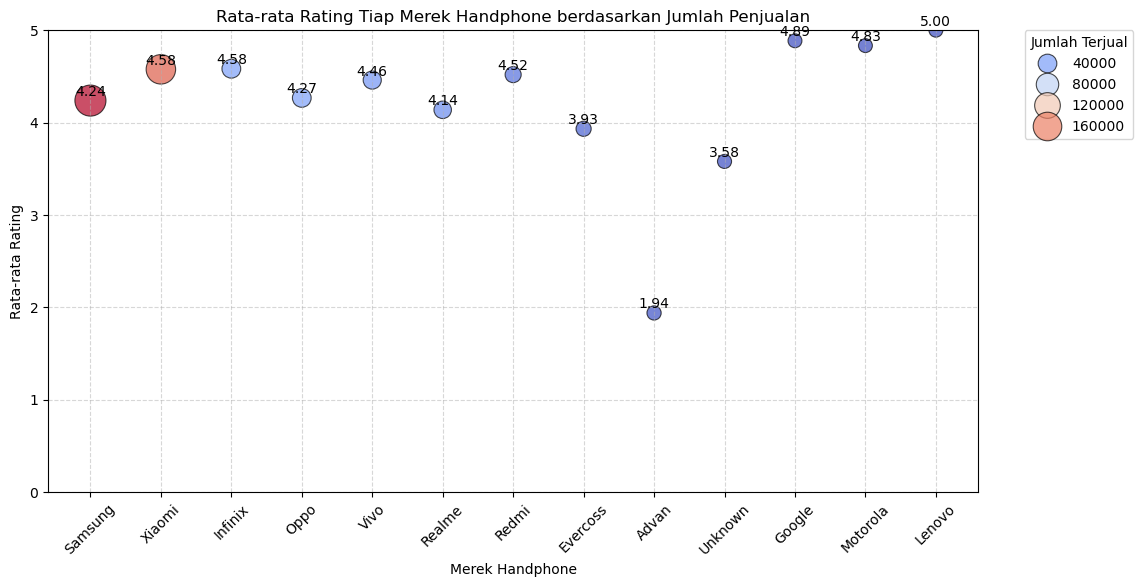

In [52]:
# Menghitung rata-rata rating dan total penjualan per merek
rating_per_merk = df.groupby('merk_hp').agg({'rating': 'mean', 'jumlah_terjual': 'sum'}).reset_index()

# Mengurutkan berdasarkan jumlah terjual agar lebih jelas
rating_per_merk = rating_per_merk.sort_values(by='jumlah_terjual', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=rating_per_merk, 
                     x='merk_hp', 
                     y='rating', 
                     size='jumlah_terjual', 
                     sizes=(100, 500), 
                     hue='jumlah_terjual', 
                     palette='coolwarm', 
                     edgecolor='black', 
                     alpha=0.7)
for i in range(len(rating_per_merk)):
    plt.text(x=rating_per_merk['merk_hp'].iloc[i], 
             y=rating_per_merk['rating'].iloc[i] + 0.05, 
             s=f"{rating_per_merk['rating'].iloc[i]:.2f}", 
             ha='center', fontsize=10)

plt.title('Rata-rata Rating Tiap Merek Handphone berdasarkan Jumlah Penjualan')
plt.xlabel('Merek Handphone')
plt.ylabel('Rata-rata Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Jumlah Terjual", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

Berdasarkan grafik disamping, dapat diketahui bahwa Samsung dan Xiaomi memiliki penjualan tertinggi meskipun rata-rata ratingnya tidak setinggi merk lain seperti Google, Motorola, dan Lenovo. Tetapi demikian, Samsung, Xiaomi, Infinix, Oppo, Vivo, Realme, dan Redmi menawarkan berbagai macam variasi produk Handphone di marketplace, sehingga memiliki penilaian rata-rdiatas bintang 4 yang lebih bervariasi dibandingkan yang lainnya. Sehingga dapat disimpulkan bahwa popularitas sebuah produk terkadang tidak selalu berbanding lurus dengan rating.

Hal ini bisa disebabkan dari berbagai faktor, seperti dari masalah saat barang diterima, masalah saat pengiriman, kekurangan dalam produk yang diterima, dan lain-lain yang menjadikan penilaian menurun/berkurang.

Tetapi di sisi lain, jika rata-rata penilaian diatas bintang 4+ dapat diasumsikan bahwa produk handphone sudah cukup baik dan dapat dipercaya untuk dibeli, walaupun tidak  rata-rata rating bintang 5.

## Kesimpulan

Pasar handphone android di Indonesia untuk awal tahun 2025 didominasi oleh produk di rentang harga 1-3 juta, dengan beberapa minat yang tinggi juga pada segmen flagship (di atas 10 juta). Samsung dan Xiaomi menjadi dua merek yang mendominasi baik dari segi jumlah produk, angka penjualan, maupun popularitas di marketplace tokopedia, dengan angka penjualan masing-masing 198.218 unit dan 173.549 unit.

Sebagian konsumen lebih memilih untuk memilih membeli di Official Store, terbukti dari dominasi Xiaomi Official Store (76.000 unit) dan Samsung Official Store (42.446 unit), meskipun beberapa toko non-official tetap memiliki angka penjualan tinggi. Mayoritas produk tidak mendukung COD, kemungkinan karena risiko pembayaran yang tinggi bagi penjual. Sementara itu, Jakarta Pusat mencatat angka penjualan tertinggi (177.308 unit), menunjukkan posisinya sebagai pusat perdagangan utama.

Samsung Galaxy A05s menjadi produk terlaris (14.050 unit), menandakan tingginya permintaan di segmen 2-3 juta, sementara di segmen 1-2 juta dan 5-6 juta didominasi oleh produk dari Xiaomi dengan Poco M6 dan Poco F6. Secara keseluruhan, pasar handphone Android di Indonesia sangat kompetitif, dengan strategi pemasaran yang harus disesuaikan dengan segmentasi harga dan preferensi konsumen.